# CLIP Interrogator 2.4 by [@pharmapsychotic](https://twitter.com/pharmapsychotic) 

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms. 

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-97ee0709-6195-32b5-4d5f-148d7438a017)


In [2]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'blip-base' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)
        

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.8/787.8 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.7 MB/s eta 0:00:00

Loading caption model blip-large...


Loading CLIP model ViT-L-14/openai...


100%|████████████████████████████████████████| 933M/933M [00:03<00:00, 246MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 163MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:00<00:00, 356MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 34.3MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 21.3MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 23.1MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 24.7MB/s]

Loaded CLIP model and data in 15.67 seconds.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Image to prompt! 🖼️ -> 📝
   
def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)        
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


there is a woman taking a selfie in a bathroom mirror, wearing a white blouse, f 2 0, wearing a white shirt, white blouse, clothed in white shirt, white shirt, f / 2 0, dressed in a white t-shirt, photo of slim girl, white wrinkled shirt, wearing white shirt, off the shoulder shirt


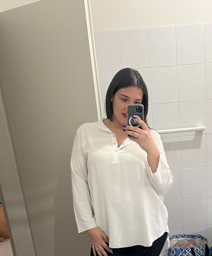

Generating prompts:   9%|▊         | 301/3477 [09:28<1:30:39,  1.71s/it]

woman with curly hair hugging a dog in a park, havanese dog, freedom from cptsd, cute furry needs your help, adult dog, black scribbles and wiggles, gadigal, jet black tuffe coat, elaine benes, on a hot australian day, medium - long curly brown hair, parks and public space


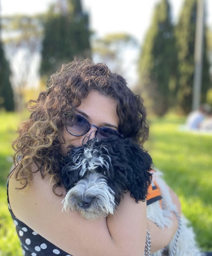

Generating prompts:   9%|▊         | 302/3477 [09:29<1:26:53,  1.64s/it]

araffe woman sitting on a bench reading a magazine, twen magazine, editorial story, wearing a black leather vest, book, leather fur jacket, editorial, young business woman, fashion magazine, wearing samcrow leather jacket, wearing a black leather jacket, magazine, fashion magazine style, still from a music video, wearing a leather trench coat, black leather jacket


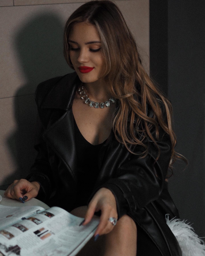

Generating prompts:   9%|▊         | 303/3477 [09:31<1:25:44,  1.62s/it]

araffe woman in a black dress posing with a red balloon, black and red dress, mixture turkish and russian, long curly light blond hair, long wavy blond hair, beautiful woman in a black dress, sexy girl with long blonde hair, wearing a red dress, sexy red dress, 2 4 year old female model, red dress, wearing a tight black dress


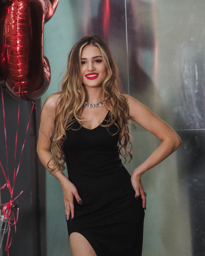

Generating prompts:   9%|▊         | 304/3477 [09:32<1:25:22,  1.61s/it]

araffe woman standing on a balcony overlooking the ocean, joey king, photo of slim girl, style of julia razumova, blue jeans and grey sneakers, outfit : jeans and white vest, marischa becker, white hat, dressed anya taylor - joy, photo of slim girl model, white baseball cap, marina federovna, inspired by Ion Andreescu


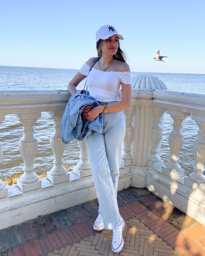

Generating prompts:   9%|▉         | 305/3477 [09:34<1:24:28,  1.60s/it]

woman in red bikini sitting on a boat with a drink, joey king, on a boat on a lake, relaxing on a yacht at sea, photo of slim girl, on a lake, on a boat, chill summer, on a yacht at sea, on a super yacht, beautiful woman body, upper body image, wet skin and windblown hair


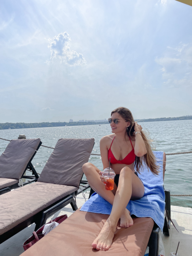

Generating prompts:   9%|▉         | 306/3477 [09:37<1:42:22,  1.94s/it]

skier in blue jumps standing on a railing overlooking a snowy mountain, holding a snowboard, snow weather, winter park background, snowfall, chairlifts, snowy peak, skiing, blizzard in the mountains, taken on go pro hero8, snowy, high above treeline, pepe the frog snowboarding, shot on gopro9, phone in hand, panoramic centered view of girl


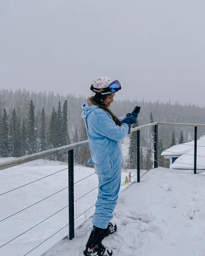

Generating prompts:   9%|▉         | 307/3477 [09:39<1:46:11,  2.01s/it]

there is a woman that is taking a selfie with her cell phone, trending on artbreeder, streaming on twitch, without makeup, natural make-up, natural makeup, f 2 0, inspired by Tatiana Hordiienko, light makeup focus, style of julia razumova, russian academic, diffused natural skin glow, f 2 2, f22


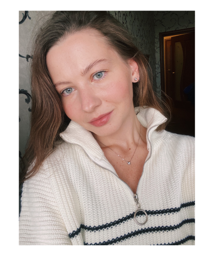

Generating prompts:   9%|▉         | 308/3477 [09:41<1:45:43,  2.00s/it]

woman taking a selfie in a mirror in a room, vintage dress, style of julia razumova, ukrainian national clothes, georgian dress, blue-white dress, inspired by Nadya Rusheva, wearing a tudor style dress, wearing a long flowy fabric, inspired by Elina Karimova, summer dress, inspired by Olha Darchuk


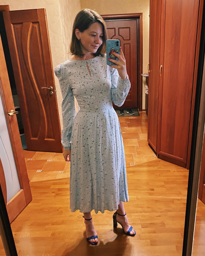

Generating prompts:   9%|▉         | 309/3477 [09:43<1:45:13,  1.99s/it]

arafed woman standing on a balcony overlooking a harbor and boats, style of julia razumova, ukrainian national clothes, inspired by Elina Karimova, wearing a dress of gossamer gold, inspired by Nadya Rusheva, wearing a dress made of water, hrushevka on background, marina federovna, summer dress, luxury dress


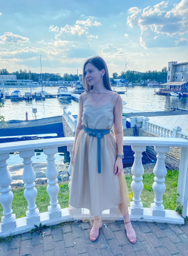

Generating prompts:   9%|▉         | 310/3477 [09:45<1:46:47,  2.02s/it]

there is a woman taking a selfie in a bathroom mirror, f 1 6, f16, orange skin, orange body, 19-year-old girl, long wavy orange hair, 1 9 year old, orange halter top, fluffy orange skin, orange hair, 20yo, mixture turkish and russian, 2 0 yo, sexy body and face


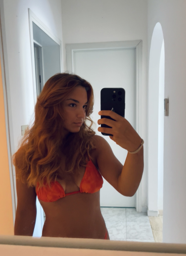

Generating prompts:   9%|▉         | 311/3477 [09:47<1:39:16,  1.88s/it]

woman eating a slice of watermelon with a black hat, wearing a melon, watermelons, watermelon, watermeloncore, material is!!! watermelon!!!, fruit celebrity, f16, f 1 6, anya forger, louise dalh - wolfe, photo in style of tyler mitchell, fruit monster, f/16, f / 1 6


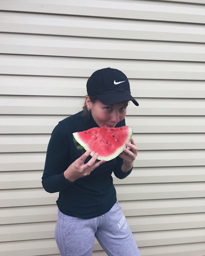

Generating prompts:   9%|▉         | 312/3477 [09:48<1:33:49,  1.78s/it]

there is a woman with long hair posing for a picture, loba andrade from apex legends, streaming on twitch, f 2 0, 19-year-old girl, mid 2 0's female, hot petite, 2 4 year old female model, cute young redhead girl, f / 2 0, redhead girl, f 1 6, f16


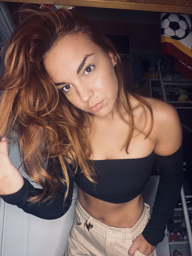

Generating prompts:   9%|▉         | 313/3477 [09:51<1:49:50,  2.08s/it]

there is a woman in a red dress posing for a picture, dominating red color, sexy red dress, red short dress, auroracore, she is redhead, fiery red, red, bella ragazza, red dress, red body suit, girl wears a red dress, amy rose red dress, sleeveless red dress, silver red, wearing a red dress, rich red


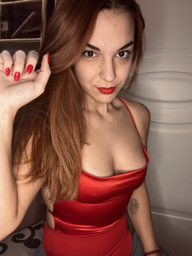

Generating prompts:   9%|▉         | 314/3477 [09:53<1:54:47,  2.18s/it]

there is a woman taking a selfie in a mirror, teenage vanessa morgan, red t-shirt, italian looking emma, red shirt, f16, f 1 6, sport t-shirt, bella ragazza, julia sarda, 19-year-old girl, red elegant shirt, photo of slim girl, f18, f 1 8


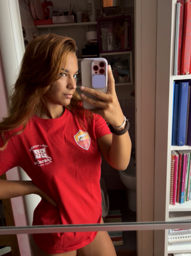

Generating prompts:   9%|▉         | 315/3477 [09:55<1:44:28,  1.98s/it]

there is a woman with long red hair and a green top, loba andrade from apex legends, without makeup, marischa becker, redhead girl, thin long auburn hair, cam de leon, f 2 0, short copper hair, she is redhead, ( redhead, thin lustrous auburn hair, light red hair, aenami alena


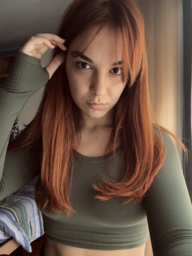

Generating prompts:   9%|▉         | 316/3477 [09:57<1:44:14,  1.98s/it]

araffed woman in a white lingerie posing for a picture, wearing white camisole, white lace clothing, wearing white silk, white lace, white blouse, lace underwear, white long tanktop, seductive camisole, sexy girl with long blonde hair, blond long hair, dressed in white intricate lace, wearing white leotard, wearing a white blouse


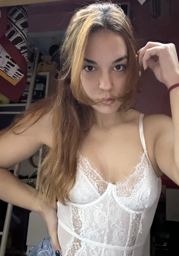

Generating prompts:   9%|▉         | 317/3477 [09:59<1:40:53,  1.92s/it]

there is a woman that is holding a pizza in her hand, red hat, red cap, red dress and hat, f 2 0, f 2 4, f 2 2, f22, long wavy orange hair, f32, f 3 2, red dress and magic witch hat, hat, mario hat, long light red hair, long shaggy red hair


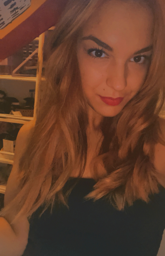

Generating prompts:   9%|▉         | 318/3477 [10:00<1:36:12,  1.83s/it]

araffe with a black and white striped cat in a woman's arms, woman and cat, f 2 0, woman / cat hybrid, she is holding a cat in her arms, crazy cat lady, jesus holding a cute cat, holding a cat, woman holding another woman, f18, f 1 8, f32, f 3 2


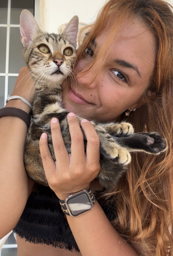

Generating prompts:   9%|▉         | 319/3477 [10:02<1:37:35,  1.85s/it]

arafed woman taking a selfie in a gym with a camera, in a gym, gym, fey, wearing fitness gear, loba andrade from apex legends, workout, training bra, batwoman, wearing a santa hat, chun li at the gym, wearing santa hat, tamara de lepika, working out, fit woman, elden ring class, red horns


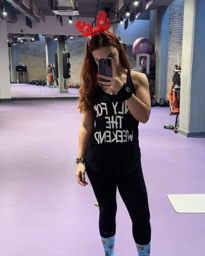

Generating prompts:   9%|▉         | 320/3477 [10:04<1:34:41,  1.80s/it]

araffe woman taking a selfie in a gym with dumbs, gym, female gigachad, twitch streamer, in a gym, style of aenami alena, streaming on twitch, background a gym, mandy jurgens golden ratio, photo of slim girl, two piece workout clothes, mixture turkish and russian, loba andrade from apex legends


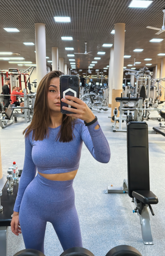

Generating prompts:   9%|▉         | 321/3477 [10:06<1:36:48,  1.84s/it]

there is a woman taking a picture of herself in a mirror, pointè pose, wearing tight simple clothes, crop yoga short, pointé pose;pursed lips, in a photo studio, model standing pose, standing pose, short puffy pants, small waist, workout, doing splits and stretching, wearing crop top and miniskirt, wearing black shorts, tiny waist


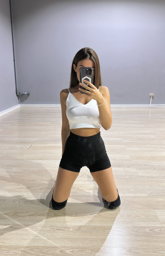

Generating prompts:   9%|▉         | 322/3477 [10:08<1:39:05,  1.88s/it]

arafed woman laying on a sailboat with her legs up, legs spread, detailed legs towering over you, long thin legs, long legs, relaxing on a yacht at sea, very beautiful long slim legs, detailed legs looming over you, very beautiful slim legs, legs taking your pov, barefoot beautiful girl alien, on a yacht at sea, full legs


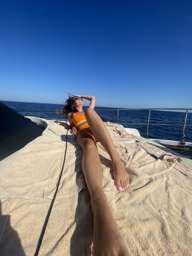

Generating prompts:   9%|▉         | 323/3477 [10:10<1:49:22,  2.08s/it]

there is a woman swimming in a pool with a frisbee, inspired by Eric Zener, by Eric Zener, infinity concentric pool, eric zener cam de leon, whirlpool, eric zener aykut aydogdu, smooth eric zener cam de leon, pool caustics, an eerie whirlpool, water ripples, by Leandro Erlich


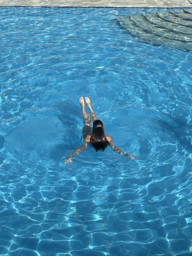

Generating prompts:   9%|▉         | 324/3477 [10:12<1:49:56,  2.09s/it]

araffe woman taking a selfie in a mirror in a black dress, total black outfit, wearing black modern clothes, wearing modern gothic clothes, black outfit, black shoes, gothic girl dressed in black, dark black long dress, full black dress, f 2 0, dark minimal outfit, full body pictures, an elegant woman in black dress, wearing black open toe heels


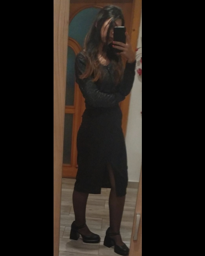

Generating prompts:   9%|▉         | 325/3477 [10:14<1:42:29,  1.95s/it]

there is a woman wrapped up in a blanket standing on a ledge, ghost of kiev, neo kyiv, beautiful city black woman only, night city on the background, olya bossak, inspired by Anka Zhuravleva, kyza, by Nadya Rusheva, inspired by Mikhail Lebedev, inspired by Dimitre Manassiev Mehandjiysky


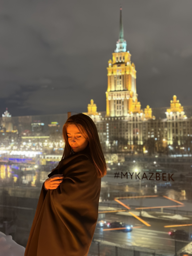

Generating prompts:   9%|▉         | 326/3477 [10:16<1:43:04,  1.96s/it]

araffe and a woman sitting on a bed with a cat on her lap, kiss, inspired by Elliott Erwitt, lovely kiss, kissing, unconditional love, kissing together cutely, making out, the kiss, lesbian kiss, kissing together, french kiss, lovable and furry, by Mollie Forestier-Walker, happy finnish lapphund dog


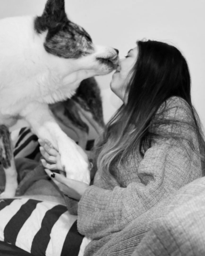

Generating prompts:   9%|▉         | 327/3477 [10:18<1:36:58,  1.85s/it]

smiling woman holding a cell phone in her hand and looking at the camera, f 2 2, f22, f / 2 2, f/22, very big smile, f 2 0, smileeeeeee, with a beautifull smile, dirty mirror, f / 2 0, happy look, big smile, f / 2 4, large smile, focus on smile


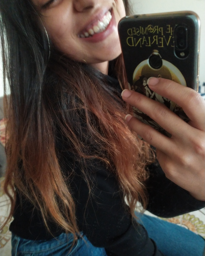

Generating prompts:   9%|▉         | 328/3477 [10:20<1:40:25,  1.91s/it]

there is a woman taking a picture of herself with her cell phone, long hair ， full color, hair dyed to a hazelnut brown, golden straight hair, blond brown long hair, wavy hair combed to one side, f 3 2, f32, rusty colored long hair, long light bronze brown hair, reddish gold hair, brown long and straight hair


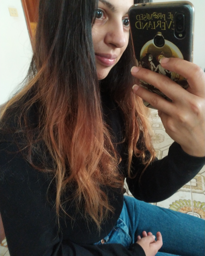

Generating prompts:   9%|▉         | 329/3477 [10:22<1:43:17,  1.97s/it]

there is a woman that is hugging a dog in the street, wolfgirl, wolf companion, photo of wolf, wolf, with dogs, wolf ears, half wolf, wolf like a human, selfie of a dog, over the head of a sea wolf, wolf head, loba andrade from apex legends, japanese dog, with stray dogs, inuk, foxgirl


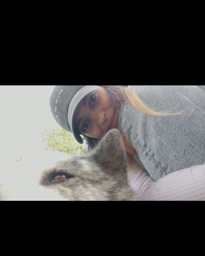

Generating prompts:   9%|▉         | 330/3477 [10:24<1:41:56,  1.94s/it]

there is a woman and a dog in the water with a dog, in a lake, in lake, queen of the sea mu yanling, lake baikal in the background, inuk, samoyed dog, in the sea, floathing underwater in a lake, desna, in summer, lake background, lake, guardian of the holy lake, swimming


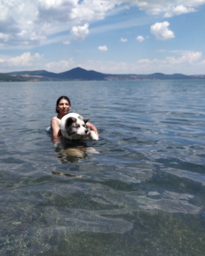

Generating prompts:  10%|▉         | 331/3477 [10:25<1:38:18,  1.87s/it]

woman with long hair and black hat hugging a white and gray dog, selfie of a dog, loba andrade from apex legends, freedom from cptsd, her whole head fits in the frame, his whole head fits in the frame, perfect spring day with, with dogs, !! looking at the camera!!, two finnish lapphunds, woof woof


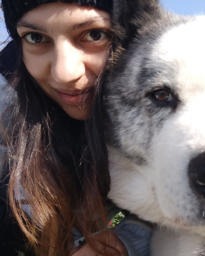

Generating prompts:  10%|▉         | 332/3477 [10:27<1:36:24,  1.84s/it]

araffe dog looking up at a person with a hat on, selfie of a dog, wolf companion, his whole head fits in the frame, her whole head fits in the frame, over the head of a sea wolf, photo of wolf, two dogs, front - facing perspective, pov, close to the camera, looming over you, pov photo


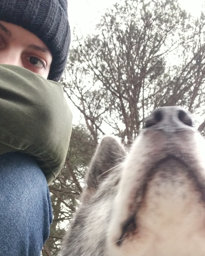

Generating prompts:  10%|▉         | 333/3477 [10:29<1:34:39,  1.81s/it]

there is a woman standing in front of a wall with a cell phone, baggy clothing and hat, grunge aesthetic, grunge aesthetic!!! (, grunge aesthetic!!!, young glitched woman, baggy jeans, 165 cm tall, tall female emo art student, 155 cm tall, image overlays, lofi girl aesthetic, female streetwear blogger


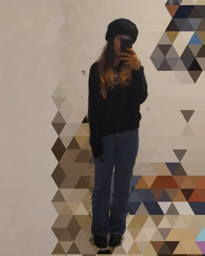

Generating prompts:  10%|▉         | 334/3477 [10:30<1:32:54,  1.77s/it]

arafed woman sitting on a wall in front of a stone building, trulli, apulia, goddess of travel, italy, beautiful stella maeve magician, italian mediterranean city, girl venizian, torri, inspired by Anita Malfatti, fantasy italy, italian masterpieces, panoramic view of girl, decollete, by Anita Malfatti


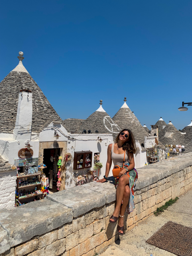

Generating prompts:  10%|▉         | 335/3477 [10:33<1:40:36,  1.92s/it]

arafed woman in a leather jacket taking a selfie in a mirror, in an old 1950s leather jacket, very aesthetic leather jacket, dressed in biker leather, wearing a leather flight jacket, she wears leather jacket, wearing samcrow leather jacket, leather jacket, wearing cyberpunk leather jacket, leather clothes, black leather jacket, dressed in short leather jacket


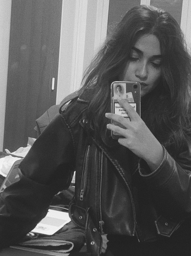

Generating prompts:  10%|▉         | 336/3477 [10:35<1:41:01,  1.93s/it]

smiling woman in black jacket and jeans standing in front of a table, anamorphic bokeh, f 2 0, background blur bokeh, overcast bokeh - c 8, out of focus background, defocused background, out - of - focus background, out-of-focus background, background bokeh, anamorphic bokeh and lens flares


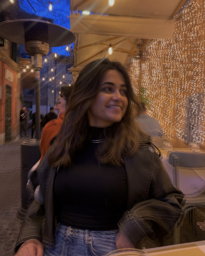

Generating prompts:  10%|▉         | 337/3477 [10:37<1:48:08,  2.07s/it]

woman sitting on a couch with a remote in her hand, tanned ameera al taweel, huge earrings and queer make up, f 2 0, smiley profile, she is wearing a black dress, short black pixie cut hair, short black hair with gel, pixie undercut short black hair, female camila mendes, black short curtain haircut


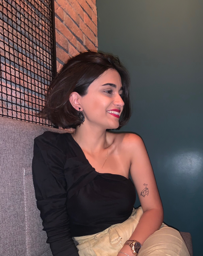

Generating prompts:  10%|▉         | 338/3477 [10:39<1:47:54,  2.06s/it]

In [ ]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results 
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/MyDrive/Pictures/unclassified" #@param {type:"string"}
prompt_mode = 'fast' #@param ["best","fast","classic","negative"]
output_mode = 'desc.csv' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.jpg')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
